In [1]:
import cv2 as cv
import numpy as np
import neat
import os
import gym
import gym_snake

from tqdm import tqdm
from matplotlib import pyplot as plt

from helpers.feature_extraction import feature_vector

# Construct Environment
env = gym.make('snake-v0')
env.grid_size = 15, 15
observation = env.reset()  # Constructs an instance of the game


In [2]:
def eval_genomes(individuals, config):
    """
    runs the game for each of the individuals
    :param config: config file from neat module
    :param individuals: list of individuals from one population
    :return: None
    """
    global env
    nets = []
    ge = []
    
    for genome_id, genome in individuals:
        genome.fitness = 0  # start with fitness level of 0
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        nets.append(net)
        ge.append(genome)

    all_eaten_apples = 0
    max_eaten_apples = 0
    
    x = 0
    for net in tqdm(nets):  # Cycle for each individual
        observation = env.reset()  # Constructs an instance of the game
        game_controller = env.controller  # Controller
        grid_object = game_controller.grid  # Grid

        snakes_array = game_controller.snakes
        snake_object = snakes_array[0]
        
        fitness, eaten_apples, steps = 0, 0, 0
        
        features = feature_vector(snake_object, grid_object.grid, env.grid_size, grid_object.FOOD_COLOR)
        output = nets[x].activate(features)  # Get input from neural network
        action = np.argmax(output).item()
#         print("\n 1, act", action, end="  ")

        %matplotlib notebook
        env.render()  # Render game
        
        observation, reward, done, info = env.step(action)
        steps += 1
        if reward == 1:
            eaten_apples += 1
            ge[x].fitness += 3.5
        elif not reward:
            ge[x].fitness -= 0.25
        else:
            ge[x].fitness -= 100

        
        while not done:  #  Game cycle
            %matplotlib notebook
            env.render()
            
            features = feature_vector(snake_object, observation, env.grid_size, grid_object.FOOD_COLOR)  # Extract features
            output = nets[x].activate(features)
            action = np.argmax(output).item()

            observation, reward, done, info = env.step(action)  #  Make a move
            steps += 1
            
            if reward == 1:
                eaten_apples += 1
                ge[x].fitness += 3.5 * (eaten_apples ** .5)
            elif not reward:
                ge[x].fitness -= 0.25
            else:
                ge[x].fitness -= 10 if steps > 15 else 100
        
        all_eaten_apples += eaten_apples
        max_eaten_apples = max(max_eaten_apples, eaten_apples)
        x += 1
    
    print("Maximum apples eaten: ", max_eaten_apples)
    print("Apples eaten on average: ", all_eaten_apples / len(individuals))

In [3]:
def run(config_file):
    """
    runs the NEAT algorithm to train a neural network to play game.
    :param config_file: location of config file
    :return: None
    """
    config = neat.config.Config(neat.DefaultGenome, neat.DefaultReproduction,
                         neat.DefaultSpeciesSet, neat.DefaultStagnation,
                         config_file)

    # Create the population, which is the top-level object for a NEAT run.
    population = neat.Population(config)

    # Add a stdout reporter to show progress in the terminal.
    population.add_reporter(neat.StdOutReporter(True))
    stats = neat.StatisticsReporter()
    population.add_reporter(stats)
    #p.add_reporter(neat.Checkpointer(5))

    # Run for up to 50 generations.
    winner = population.run(eval_genomes, 50)

    # show final stats
    print('\nBest genome:\n{!s}'.format(winner))



 ****** Running generation 0 ****** 



<IPython.core.display.Javascript object>


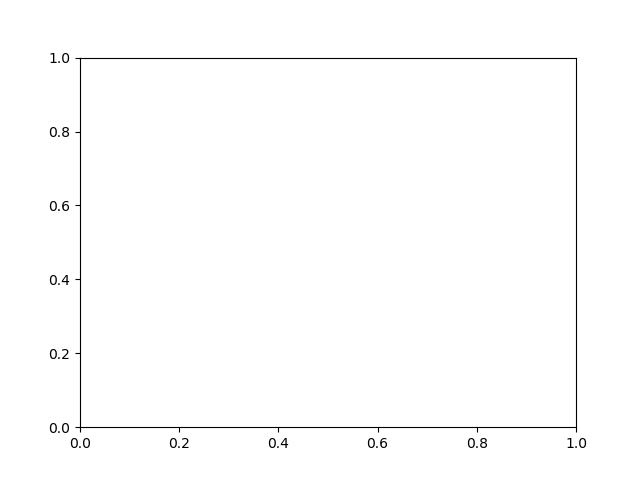

Apples eaten on average:  0.1
Population's average fitness: -98.51000 stdev: 17.94401
Best fitness: -10.75000 - size: (8, 56) - species 16 - id 16
Average adjusted fitness: 0.056
Mean genetic distance 3.169, standard deviation 0.435
Population of 104 members in 50 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0     2   -103.8    0.000     0
     2    0     2   -102.0    0.019     0
     3    0     2   -102.0    0.019     0
     4    0     2   -102.8    0.011     0
     5    0     2   -102.0    0.019     0
     6    0     2   -102.8    0.011     0
     7    0     2   -102.8    0.011     0
     8    0     2   -102.0    0.019     0
     9    0     2   -102.8    0.011     0
    10    0     2   -102.0    0.019     0
    11    0     2   -102.8    0.011     0
    12    0     2   -102.0    0.019     0
    13    0     2   -102.0    0.019     0
    14    0     2   -102.0    0.019     0
    15    0     2   -102.0    0.019     0
    16    0 

Apples eaten on average:  0.04854368932038835
Population's average fitness: -97.15340 stdev: 20.93381
Best fitness: -6.05025 - size: (9, 56) - species 24 - id 62
Average adjusted fitness: 0.063
Mean genetic distance 3.166, standard deviation 0.433
Population of 101 members in 50 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    4     2   -102.8    0.006     2
     2    4     2   -102.0    0.018     2
     3    4     2   -102.0    0.018     4
     4    4     2   -102.0    0.013     3
     5    4     2    -99.0    0.033     1
     6    4     2    -14.5    0.462     0
     7    4     2   -102.8    0.010     4
     8    4     2   -102.0    0.018     2
     9    4     2   -102.0    0.014     3
    10    4     2    -15.5    0.458     0
    11    4     2   -102.8    0.010     3
    12    4     2   -102.8    0.009     4
    13    4     2   -102.0    0.018     2
    14    4     2   -102.0    0.009     4
    15    4     2   -102.0    0.014    

Apples eaten on average:  0.03
Population's average fitness: -98.83750 stdev: 17.22775
Best fitness: -13.75000 - size: (8, 56) - species 12 - id 12
Average adjusted fitness: 0.055
Mean genetic distance 3.166, standard deviation 0.432
Population of 104 members in 50 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    8     2   -102.8    0.006     6
     2    8     2   -102.0    0.018     2
     3    8     2   -102.0    0.019     8
     4    8     2   -101.5    0.022     0
     5    8     2   -102.0    0.019     5
     6    8     2   -102.8    0.010     2
     7    8     2   -102.8    0.011     3
     8    8     2   -102.0    0.019     6
     9    8     2   -102.0    0.015     2
    10    8     3    -14.0    0.508     0
    11    8     3    -14.2    0.501     0
    12    8     3    -13.8    0.506     0
    13    8     2   -102.0    0.019     6
    14    8     2   -102.0    0.019     8
    15    8     2   -102.2    0.014     8
    16    8

Apples eaten on average:  0.06862745098039216
Population's average fitness: -98.70833 stdev: 16.99095
Best fitness: -14.00000 - size: (8, 56) - species 16 - id 16
Average adjusted fitness: 0.054
Mean genetic distance 3.161, standard deviation 0.431
Population of 103 members in 50 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   12     2   -102.0    0.015    10
     2   12     2   -102.2    0.013     6
     3   12     2   -102.0    0.019    12
     4   12     2   -102.0    0.018     3
     5   12     2    -99.0    0.036     9
     6   12     2   -102.0    0.015     6
     7   12     2   -102.8    0.011     3
     8   12     2   -102.0    0.019    10
     9   12     2   -102.0    0.015     6
    10   12     2   -102.0    0.010     4
    11   12     2   -102.8    0.007     4
    12   12     2   -102.0    0.015     4
    13   12     2   -102.0    0.019    10
    14   12     2   -102.0    0.019     3
    15   12     2   -102.0    0.015   

Apples eaten on average:  0.04854368932038835
Population's average fitness: -97.98301 stdev: 18.93590
Best fitness: -14.00000 - size: (8, 55) - species 28 - id 122
Average adjusted fitness: 0.066
Mean genetic distance 3.157, standard deviation 0.429
Population of 102 members in 50 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   16     2   -101.8    0.015    14
     2   16     2   -102.0    0.019    10
     3   16     2   -102.0    0.019    16
     4   16     2   -102.2    0.013     7
     5   16     2    -98.8    0.038    13
     6   16     2   -102.8    0.008    10
     7   16     2   -102.8    0.011     7
     8   16     2   -102.0    0.018    14
     9   16     2    -99.0    0.036    10
    10   16     2   -102.0    0.017     8
    11   16     2   -102.8    0.011     8
    12   16     2   -102.8    0.008     8
    13   16     2   -102.0    0.019    14
    14   16     2   -102.0    0.013     7
    15   16     2   -102.0    0.017  

In [ ]:
if __name__ == '__main__':
    config_path = 'config.txt'
    run(config_path)